In [1]:
!pip install ultralytics==8.0.196
!pip install roboflow

In [2]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageDraw

import json
from IPython.display import display, Image
from roboflow import Roboflow

In [4]:
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("cvworkspace-mlkdj").project("skyfusion-aerial-obj-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# # Initialize the Roboflow object with your API key
# rf = Roboflow(api_key="API_KEY")

# # Retrieve your current workspace and project name
# print(rf.workspace())

# # Specify the project for upload
# # let's you have a project at https://app.roboflow.com/my-workspace/my-project
# workspaceId = 'cvworkspace'
# projectId = 'skyfusion-aerial-obj-detection'
# project = rf.workspace(workspaceId).project(projectId)

# # Upload the image to your project
# project.upload(src)

# """
# Optional Parameters:
# - num_retry_uploads: Number of retries for uploading the image in case of failure.
# - batch_name: Upload the image to a specific batch.
# - split: Upload the image to a specific split.
# - tag: Store metadata as a tag on the image.
# - sequence_number: [Optional] If you want to keep the order of your images in the dataset, pass sequence_number and sequence_size..
# - sequence_size: [Optional] The total number of images in the sequence. Defaults to 100,000 if not set.
# """

# project.upload(
#     image_path=src,
#     batch_name="BATCH_1",
#     split="train",
#     num_retry_uploads=3,
#     tag=None,
#     sequence_number=99,
#     sequence_size=100
# )

# Training

In [5]:
# Load a model
# model = YOLO("yolov8s.yaml")  # build a new model from YAML
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)
# model = YOLO("yolov8s.yaml").load("yolov8s.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="/content/SkyFusion-Aerial-Obj-Detection-1/data.yaml", epochs=10, imgsz=640, device=0, project="/content/results", name="YOLOv8_Results")

New https://pypi.org/project/ultralytics/8.2.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/SkyFusion-Aerial-Obj-Detection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/results, name=YOLOv8_Results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_wid

In [6]:
# CLI Command
# !yolo train model=yolov8s.pt data=/content/SkyFusion-Aerial-Obj-Detection-1/data.yaml epochs=10 imgsz=640 project=/content/results name=YOLOv8_Results

`See more training arguments at:` https://docs.ultralytics.com/modes/train/#train-settings

# Validation

In [7]:
# Load a model
model = YOLO("/content/results/YOLOv8_Results/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/SkyFusion-Aerial-Obj-Detection-1/valid/labels.cache... 448 images, 0 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6430, len(boxes) = 8373. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                   all        448       8373       0.63       0.58       0.55      0.302
              Aircraft        448

array([    0.67454,     0.12188,     0.10903])

In [ ]:
# CLI Command
# !yolo detect val model=/content/results/YOLOv8_Results/weights/best.pt  # val custom model

# Predict


image 1/1 /content/SkyFusion-Aerial-Obj-Detection-1/train/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.jpg: 640x640 10 Aircrafts, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)


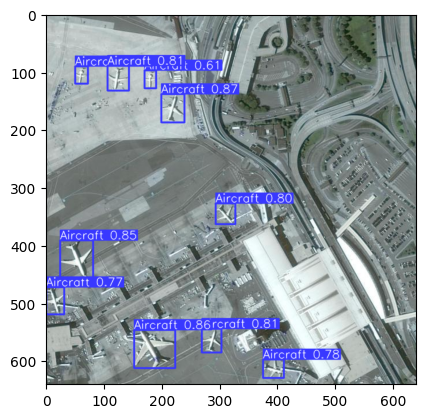

In [30]:
# Load a model
model = YOLO("/content/results/YOLOv8_Results/weights/best.pt")  # load a custom model
img = '/content/SkyFusion-Aerial-Obj-Detection-1/train/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.jpg'
label = '/content/SkyFusion-Aerial-Obj-Detection-1/train/labels/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.txt'

# Predict with the model
result = model.predict(source=img,conf=0.25)
plt.imshow(result[0].orig_img)
plt.show()

predicted_image = result[0].plot()
plt.imshow(predicted_image)
plt.show()

In [12]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.8747, 0.8593, 0.8460, 0.8122, 0.8090, 0.7957, 0.7845, 0.7690, 0.7456, 0.6075], device='cuda:0')
data: tensor([[1.9978e+02, 1.3891e+02, 2.3935e+02, 1.8702e+02, 8.7471e-01, 0.0000e+00],
        [1.5258e+02, 5.4648e+02, 2.2380e+02, 6.1206e+02, 8.5929e-01, 0.0000e+00],
        [2.4620e+01, 3.9145e+02, 8.1339e+01, 4.5622e+02, 8.4601e-01, 0.0000e+00],
        [2.6976e+02, 5.4482e+02, 3.0374e+02, 5.8587e+02, 8.1220e-01, 0.0000e+00],
        [1.0600e+02, 8.9127e+01, 1.4303e+02, 1.3221e+02, 8.0904e-01, 0.0000e+00],
        [2.9372e+02, 3.2799e+02, 3.2705e+02, 3.6325e+02, 7.9568e-01, 0.0000e+00],
        [3.7556e+02, 5.9790e+02, 4.1159e+02, 6.2905e+02, 7.8452e-01, 0.0000e+00],
        [1.1323e-01, 4.7227e+02, 3.1902e+01, 5.1997e+02, 7.6896e-01, 0.0000e+00],
        [5.0023e+01, 9.0923e+01, 7.2053e+01, 1.2076e+02, 7.4563e-01, 0.0000e+00],
        [1.7019

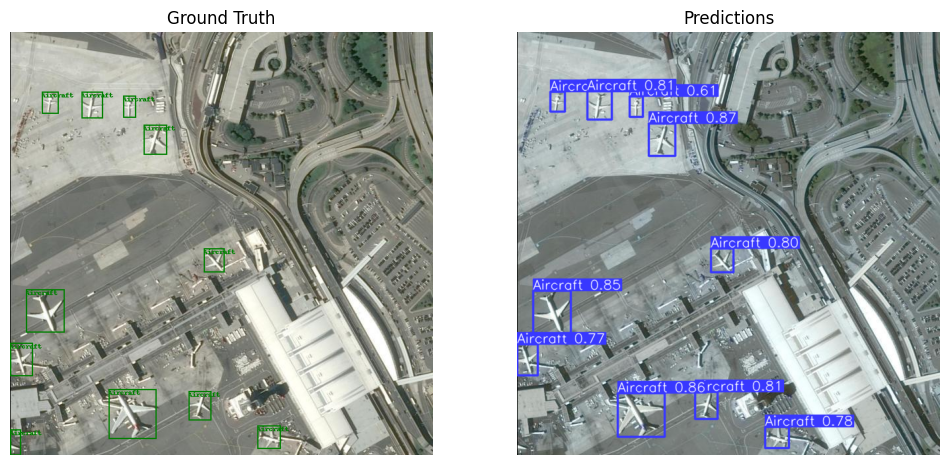

In [40]:
# Function to load YOLO labels
def load_labels(label_path):
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                labels.append((class_id, x_center, y_center, width, height))
    return labels

# Convert YOLO format to bounding box coordinates
def yolo_to_bbox(img_width, img_height, x_center, y_center, width, height):
    xmin = int((x_center - width / 2) * img_width)
    xmax = int((x_center + width / 2) * img_width)
    ymin = int((y_center - height / 2) * img_height)
    ymax = int((y_center + height / 2) * img_height)
    return [xmin, ymin, xmax, ymax]

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, color, class_names):
    image_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(image_pil)
    for class_id, x_center, y_center, width, height in boxes:
        box = yolo_to_bbox(image_pil.width, image_pil.height, x_center, y_center, width, height)
        draw.rectangle(box, outline=color, width=2)
        label = class_names[int(class_id)]
        draw.text((box[0], box[1]), label, fill=color)
    return np.array(image_pil)

# Function to process a single image and its labels
def process_image(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gt_labels = load_labels(label_path)
    image_gt = draw_boxes(image, gt_labels, color="green", class_names=class_names)
    return image_gt

class_names = ["Aircraft", "ship", "vehicle"]

image_path = img
label_path = label

gt_image = process_image(image_path, label_path, class_names)

# Display images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(gt_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.imshow(predicted_image)
plt.axis('off')

plt.show()

In [44]:
# CLI Command
!yolo detect predict model=/content/results/YOLOv8_Results/weights/best.pt source={img}  # predict with custom model

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/SkyFusion-Aerial-Obj-Detection-1/train/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.0f25aaf5f59ee5f7e63236f64f21d005.jpg: 640x640 10 Aircrafts, 21.3ms
Speed: 15.7ms preprocess, 21.3ms inference, 1090.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Unseen Video Prediction

In [45]:
!yolo detect predict model=/content/results/YOLOv8_Results/weights/best.pt source=/content/Videos

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/2 (1/293) /content/Videos/15271-262576457_small.mp4: 384x640 1 vehicle, 84.8ms
video 1/2 (2/293) /content/Videos/15271-262576457_small.mp4: 384x640 (no detections), 10.8ms
video 1/2 (3/293) /content/Videos/15271-262576457_small.mp4: 384x640 1 vehicle, 10.7ms
video 1/2 (4/293) /content/Videos/15271-262576457_small.mp4: 384x640 2 vehicles, 10.8ms
video 1/2 (5/293) /content/Videos/15271-262576457_small.mp4: 384x640 (no detections), 10.8ms
video 1/2 (6/293) /content/Videos/15271-262576457_small.mp4: 384x640 (no detections), 10.8ms
video 1/2 (7/293) /content/Videos/15271-262576457_small.mp4: 384x640 2 vehicles, 10.8ms
video 1/2 (8/293) /content/Videos/15271-262576457_small.mp4: 384x640 1 vehicle, 11.5ms
video 1/2 (9/293) /content/Videos/15271-262576457_small.mp4: 384x640 2 v

# Results Visualization

In [48]:
!ls -l /content/results/YOLOv8_Results

total 8248
-rw-r--r-- 1 root root   1463 Jul 12 12:53 args.yaml
-rw-r--r-- 1 root root 110771 Jul 12 13:06 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 116515 Jul 12 13:06 confusion_matrix.png
-rw-r--r-- 1 root root 512392 Jul 12 13:07 events.out.tfevents.1720788797.d600e4e29e39.4387.0
-rw-r--r-- 1 root root 164487 Jul 12 13:06 F1_curve.png
-rw-r--r-- 1 root root 312212 Jul 12 12:53 labels_correlogram.jpg
-rw-r--r-- 1 root root 146190 Jul 12 12:53 labels.jpg
-rw-r--r-- 1 root root 172988 Jul 12 13:06 P_curve.png
-rw-r--r-- 1 root root 169375 Jul 12 13:06 PR_curve.png
-rw-r--r-- 1 root root 161378 Jul 12 13:06 R_curve.png
-rw-r--r-- 1 root root   3696 Jul 12 13:05 results.csv
-rw-r--r-- 1 root root 281385 Jul 12 13:06 results.png
-rw-r--r-- 1 root root 594458 Jul 12 12:53 train_batch0.jpg
-rw-r--r-- 1 root root 590428 Jul 12 12:53 train_batch1.jpg
-rw-r--r-- 1 root root 559117 Jul 12 12:53 train_batch2.jpg
-rw-r--r-- 1 root root 888212 Jul 12 13:06 val_batch0_labels.jpg
-rw-r-

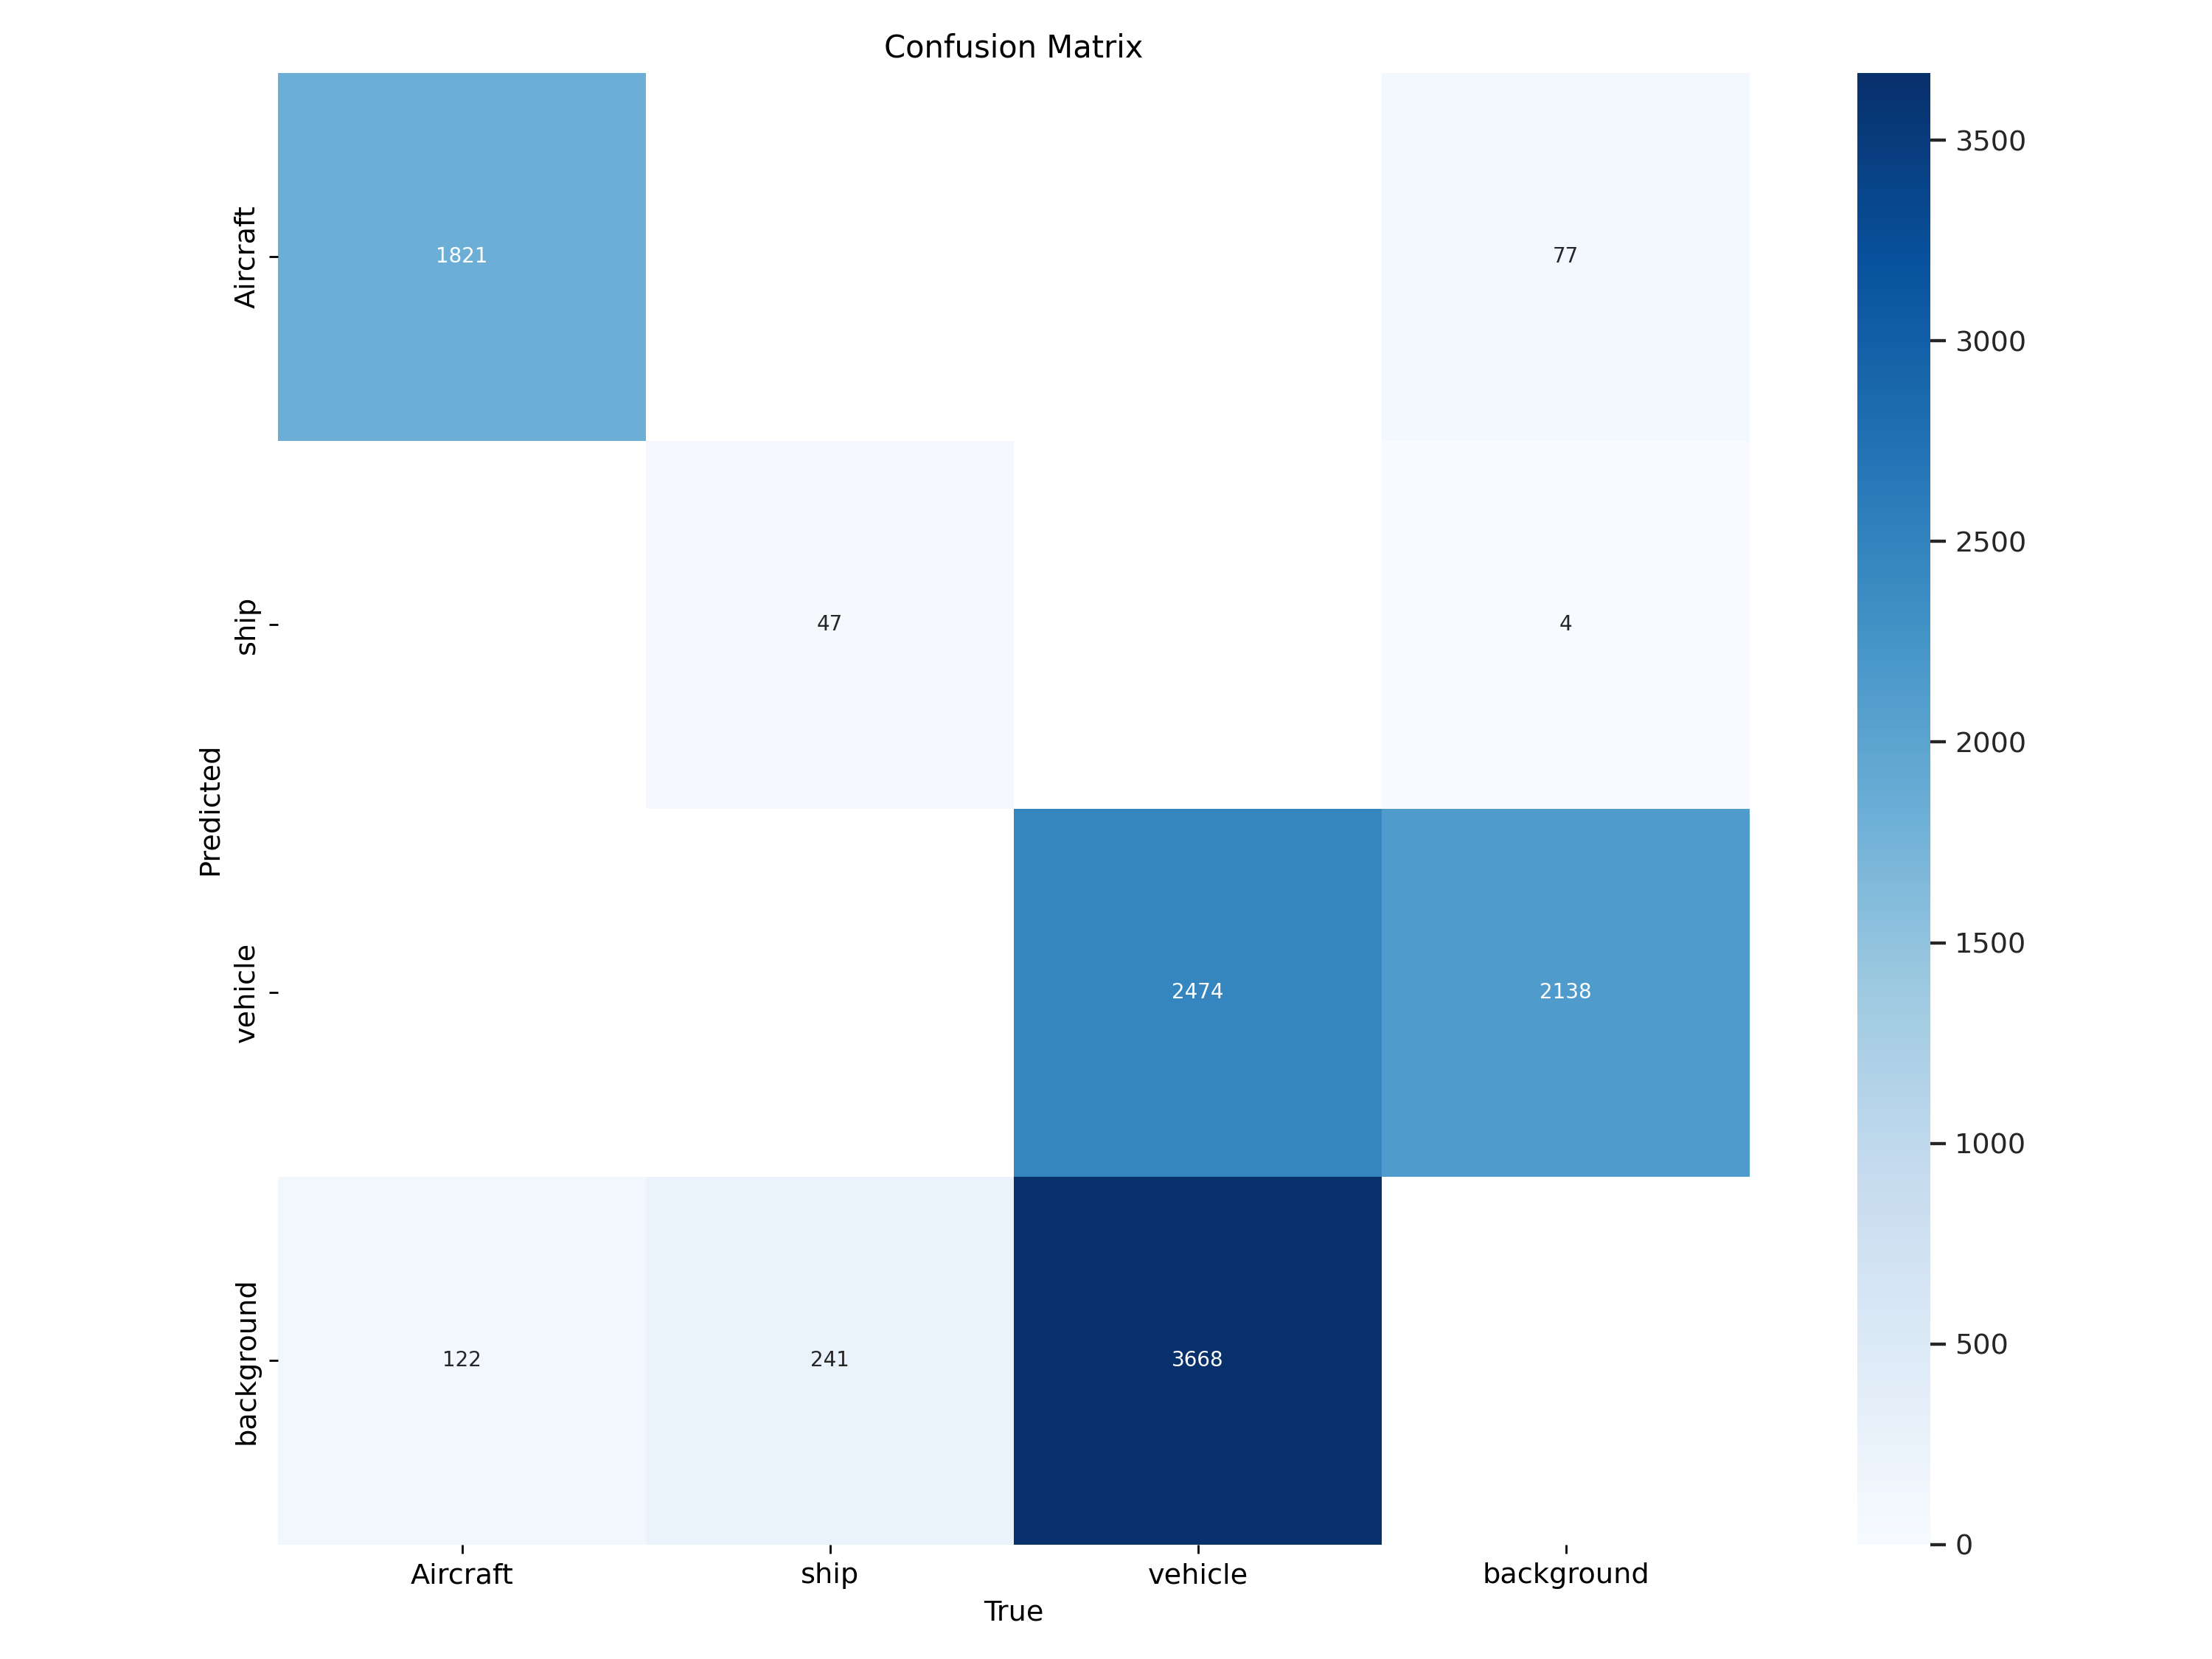

In [51]:
Image('/content/results/YOLOv8_Results/confusion_matrix.png')

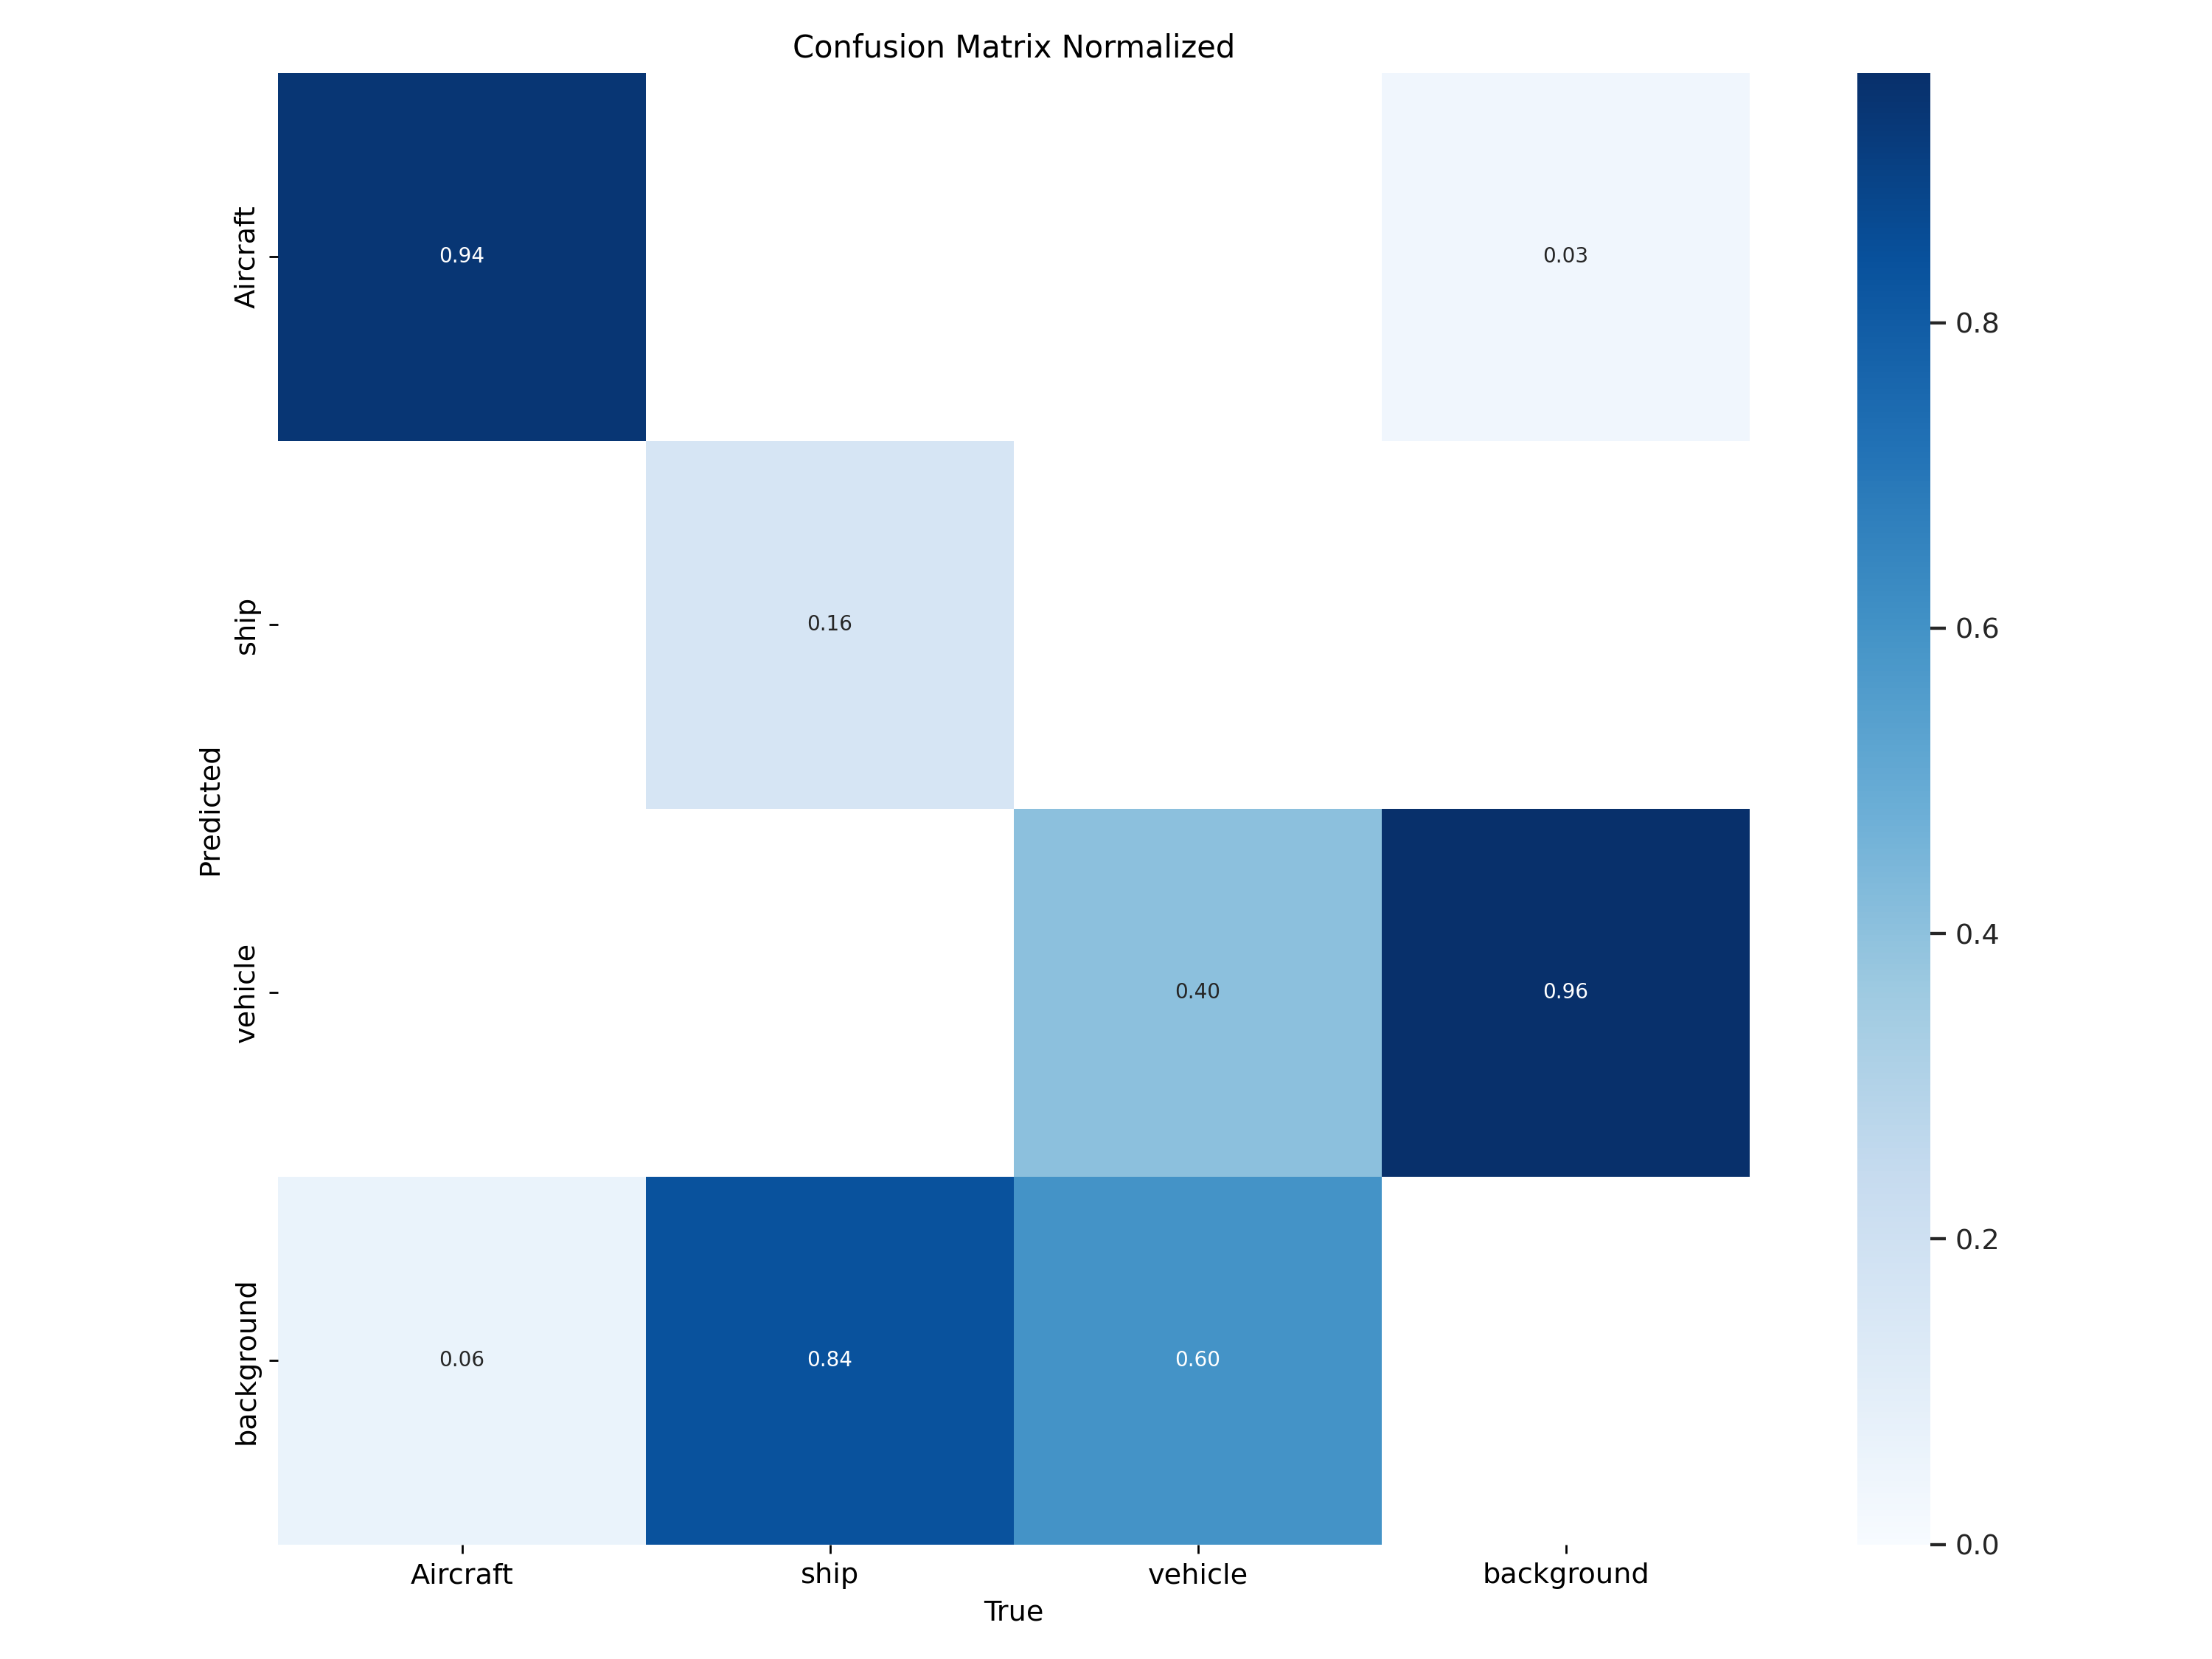

In [53]:
Image('/content/results/YOLOv8_Results/confusion_matrix_normalized.png')

In [52]:
Image('/content/results/YOLOv8_Results/results.png')

In [54]:
Image('/content/results/YOLOv8_Results/val_batch0_pred.jpg')

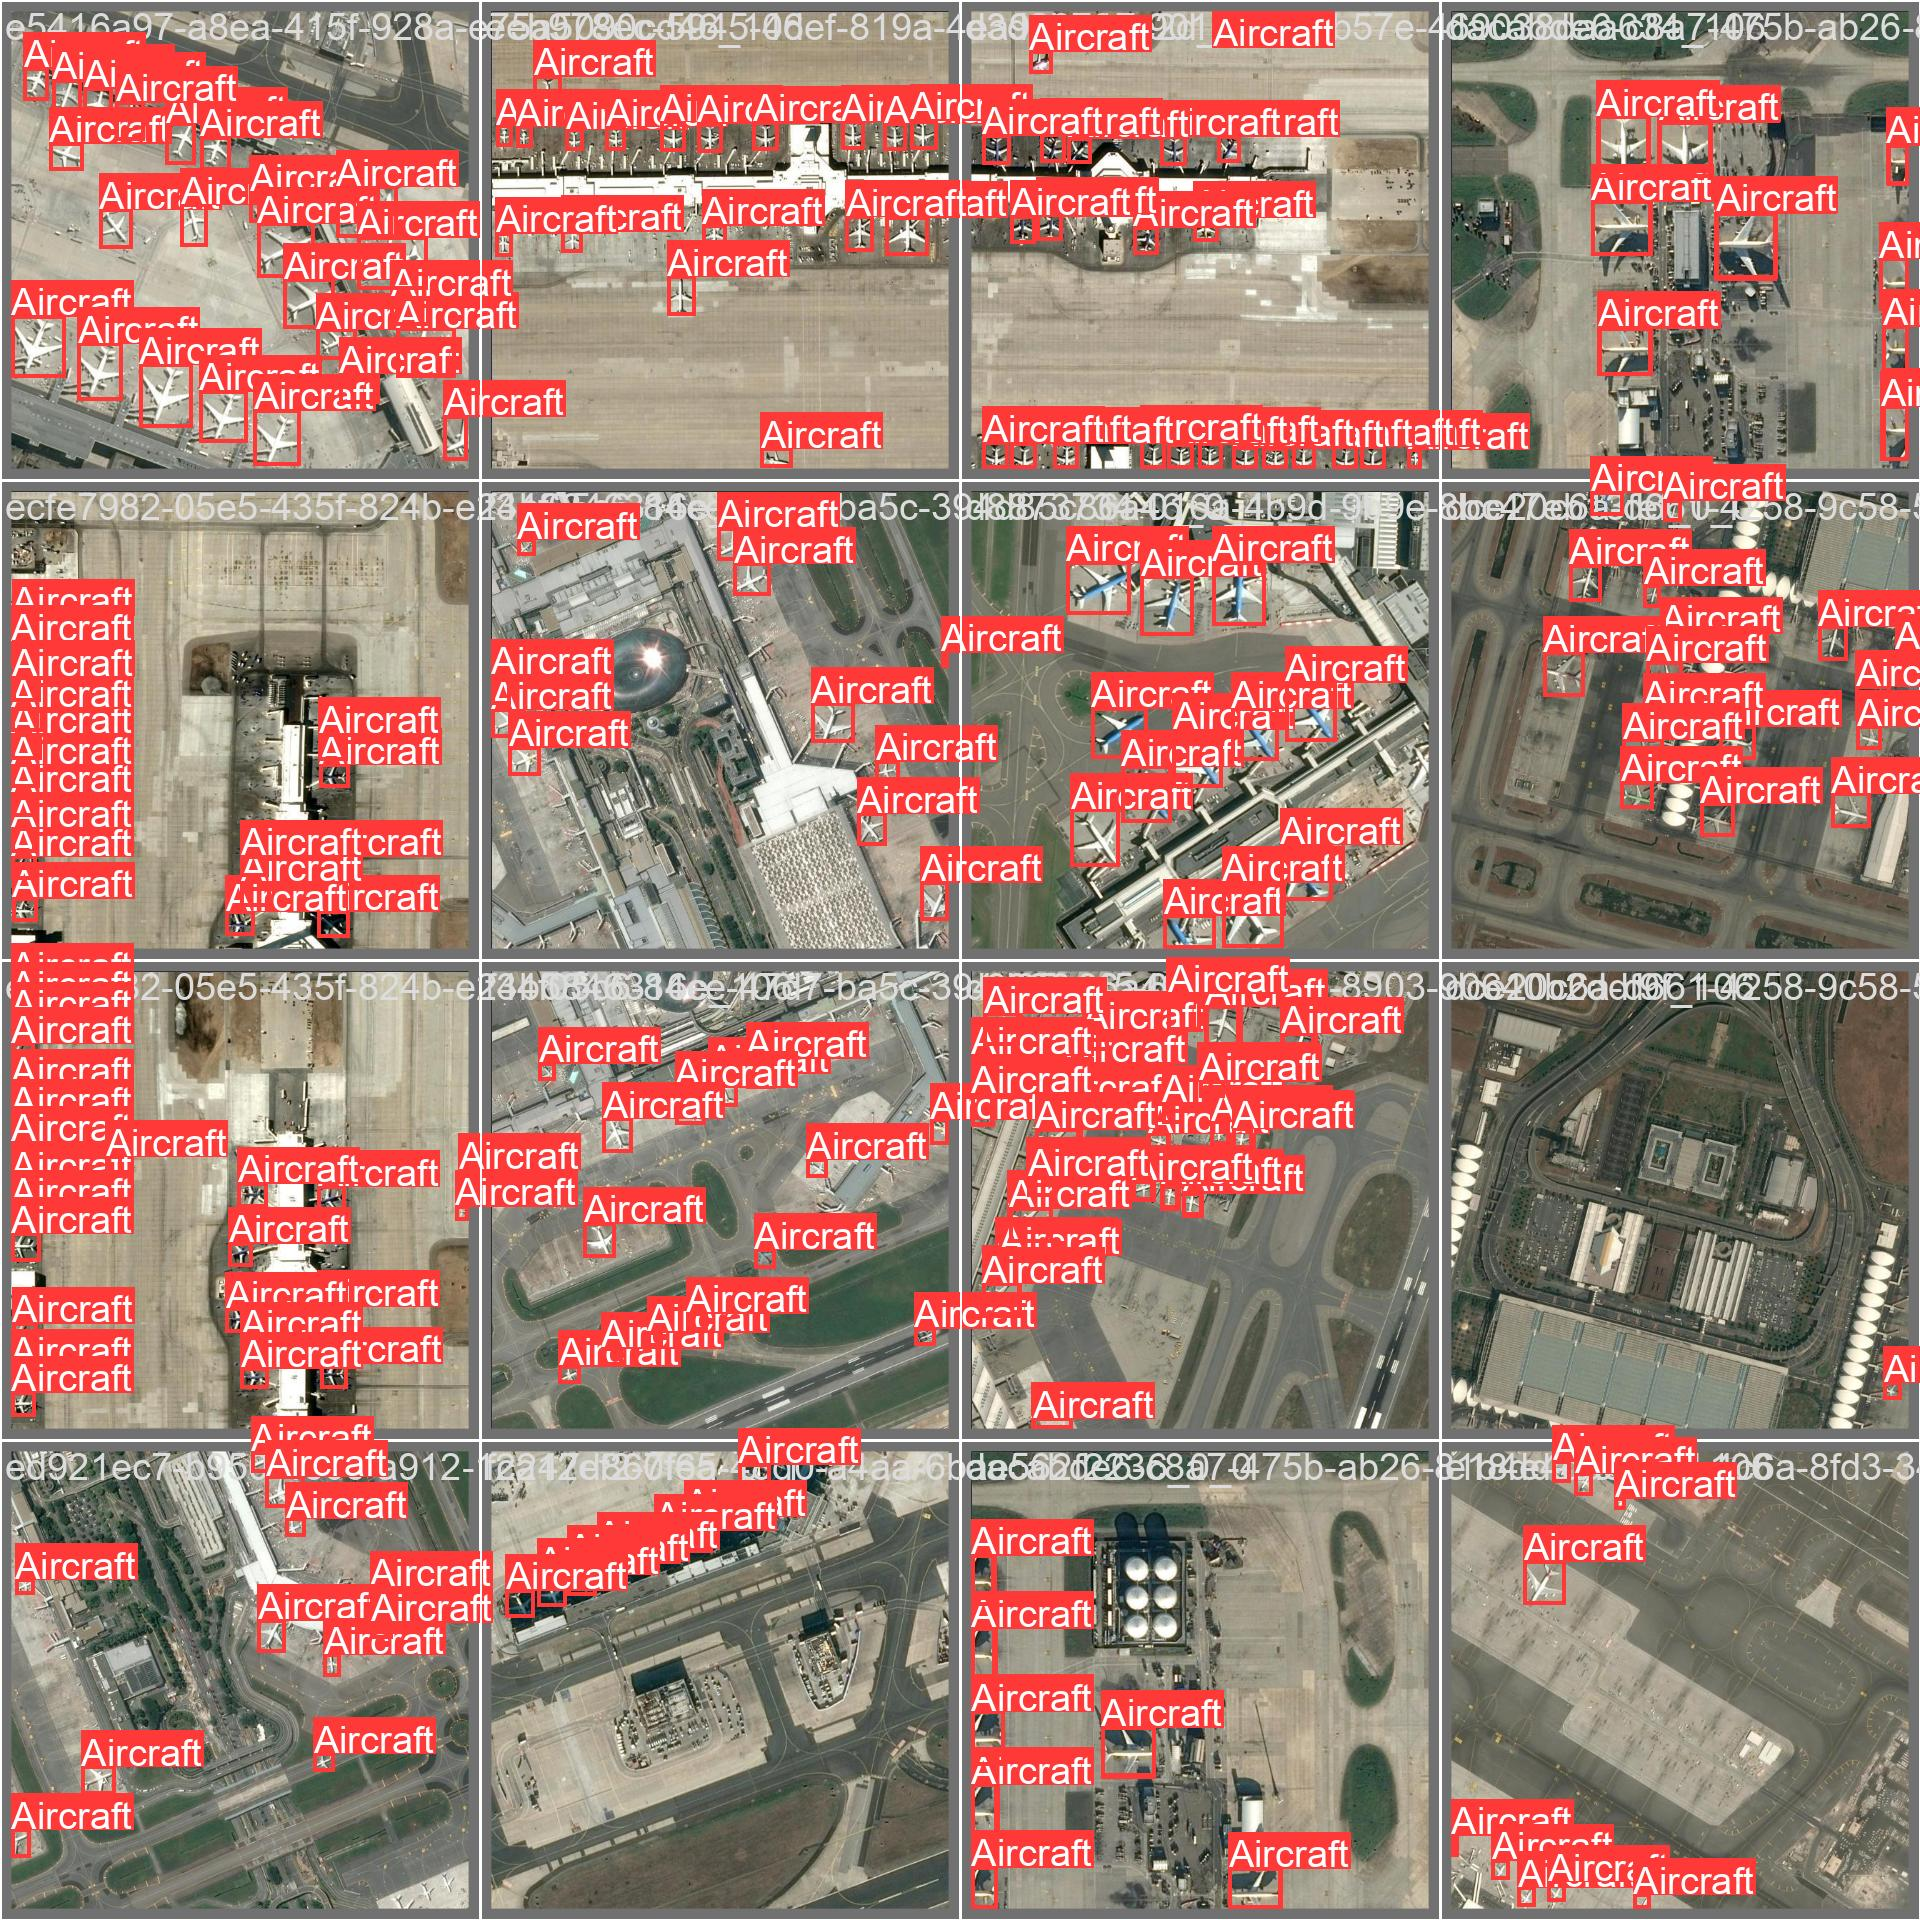

In [55]:
Image('/content/results/YOLOv8_Results/val_batch0_labels.jpg')